In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
raw_data_file = '../data/stratified_training_data/1992-2015_training_data_raw_n100000_ks_pval0.3.1.csv'

# Datatypes for dataframe loading
dtypes = {
    'weather_bin_time': object,
    'lat': float,
    'lon': float,
    'air.sfc': float,
    'rhum.2m': float,
    'dpt.2m': float,
    'pres.sfc': float,
    'uwnd.10m': float,
    'vwnd.10m': float,
    'veg': float,
    'dlwrf': float,
    'dswrf': float,
    'lcdc': float,
    'hcdc': float,
    'mcdc': float,
    'hpbl': float,
    'ulwrf.sfc': float,
    'ignition': float,
    'weather_bin_day': int,
    'weather_bin_month': int,
    'weather_bin_year': int
}

# Features to use during training 
features = [
    'weather_bin_month',
    'weather_bin_year',
    'air.sfc',
    'rhum.2m',
    'dpt.2m',
    'pres.sfc',
    'uwnd.10m', 
    'vwnd.10m',
    'veg',
    'lat',
    'lon',
    'ignition'
]

In [5]:
raw_data = pd.read_csv(raw_data_file, dtype=dtypes)

In [6]:
# count number of observations in each class
total = len(raw_data)
no_ignition_count = len(raw_data[raw_data["ignition"] == 0])
ignition_count = total - no_ignition_count
print('Total training observations: {:.2E}'.format(total))
print(' Ignitions count: {:.2E} ({}%)'.format(ignition_count,np.round(((ignition_count/total)*100),1)))
print(' Non ignitions count: {:.2E} ({}%)'.format(no_ignition_count, np.round(((no_ignition_count/total)*100),1)))

Total training observations: 5.67E+04
 Ignitions count: 2.61E+03 (4.6%)
 Non ignitions count: 5.41E+04 (95.4%)


In [7]:
# Pull out columns for X (data to train with) and Y (value to predict)
training_data = raw_data[features]

In [8]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(training_data, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('ignition'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('ignition'))
test_labels = np.array(test_df.pop('ignition'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [9]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (36299,)
Validation labels shape: (9075,)
Test labels shape: (11344,)
Training features shape: (36299, 11)
Validation features shape: (9075, 11)
Test features shape: (11344, 11)


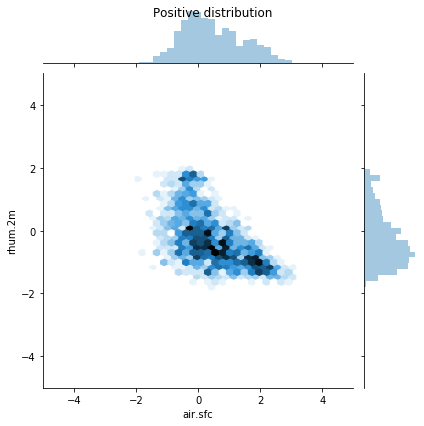

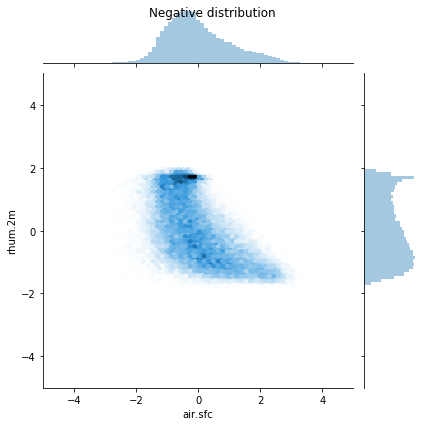

In [10]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['air.sfc'], pos_df['rhum.2m'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['air.sfc'], neg_df['rhum.2m'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

In [11]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(
            32, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(
            128, 
            activation='relu',
            input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(
            1, 
            activation='sigmoid',
            bias_initializer=output_bias
        ),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

In [12]:
EPOCHS = 50
BATCH_SIZE = int(2048 * 4)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [13]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1

In [14]:
model.predict(train_features[:10])

array([[0.20681083],
       [0.20681083],
       [0.20681083],
       [0.20681083],
       [0.20681083],
       [0.20681083],
       [0.20681083],
       [0.20681083],
       [0.20681083],
       [0.20681083]], dtype=float32)

In [15]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.2941


In [16]:
initial_bias = np.log([ignition_count/no_ignition_count])
initial_bias

array([-3.03283736])

In [17]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.04596424],
       [0.04596424],
       [0.04596424],
       [0.04596424],
       [0.04596424],
       [0.04596424],
       [0.04596424],
       [0.04596424],
       [0.04596424],
       [0.04596424]], dtype=float32)

In [18]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.1878


In [19]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [20]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [21]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [22]:
def plot_loss(history, label, n):
    # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()

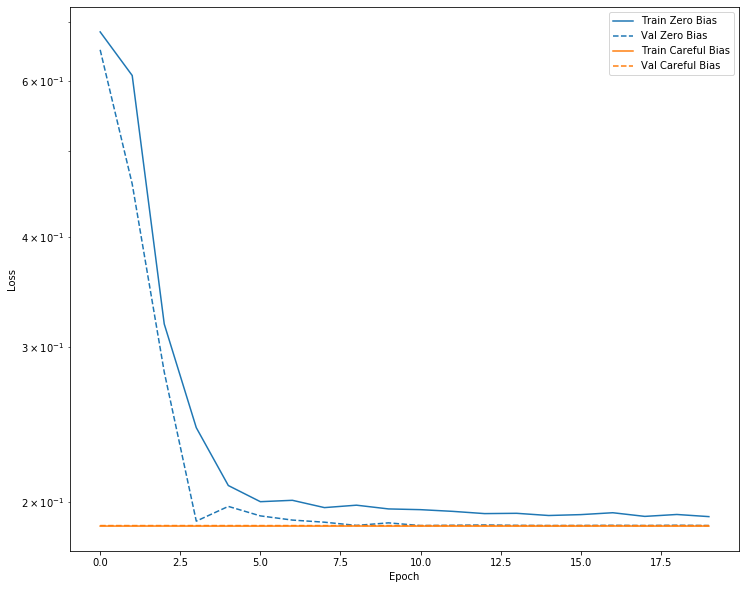

In [23]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [24]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Train on 36299 samples, validate on 9075 samples
Epoch 1/50
36299/36299 [==============================] - 8s 215us/sample - loss: 0.1879 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34614.0000 - fn: 1685.0000 - accuracy: 0.9536 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.1881 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8653.0000 - val_fn: 422.0000 - val_accuracy: 0.9535 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/50
36299/36299 [==============================] - 4s 102us/sample - loss: 0.1878 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34614.0000 - fn: 1685.0000 - accuracy: 0.9536 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.1881 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8653.0000 - val_fn: 422.0000 - val_accuracy: 0.9535 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/50
36299/36299 [==============================] - 4s 102us/sample - loss: 0.1878 - tp: 

In [25]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall', 'fp', 'fn']
    
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(3,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        
    if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
        
    elif metric == 'auc':
        plt.ylim([0.8,1])
        
    else:
        #plt.ylim([0,1])
        plt.legend()

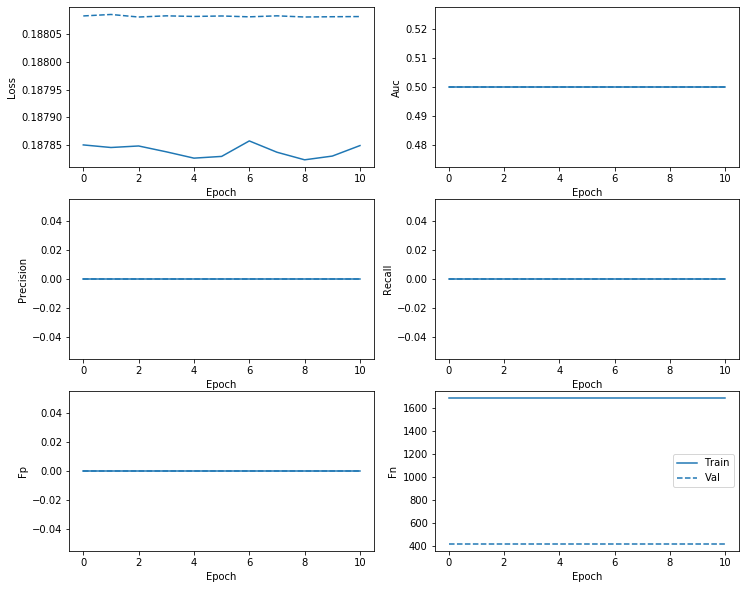

In [26]:
plot_metrics(baseline_history)

In [27]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [28]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('No fire (True Negatives): ', cm[0][0])
    print('False alarms (False Positives): ', cm[0][1])
    print('Fires missed (False Negatives): ', cm[1][0])
    print('Fires detected (True Positives): ', cm[1][1])
    print('Total fires: ', np.sum(cm[1]))

loss :  0.18076204034606225
tp :  0.0
fp :  0.0
tn :  10844.0
fn :  500.0
accuracy :  0.95592386
precision :  0.0
recall :  0.0
auc :  0.5
No fire (True Negatives):  10844
False alarms (False Positives):  0
Fires missed (False Negatives):  500
Fires detected (True Positives):  0
Total fires:  500


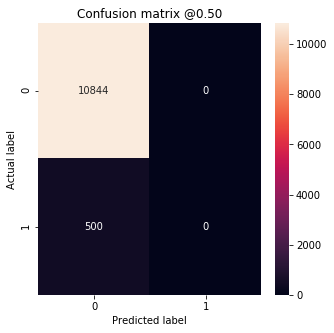

In [29]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)

plot_cm(test_labels, test_predictions_baseline)

In [30]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    #plt.xlim([-0.5,20])
    #plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

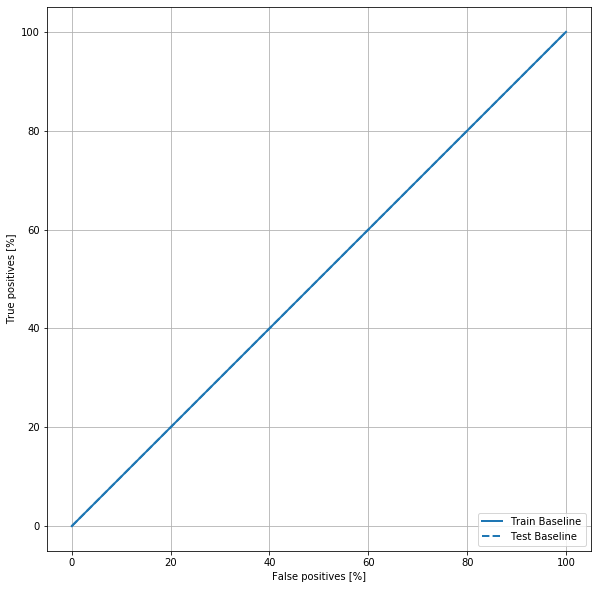

In [31]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [32]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / no_ignition_count)*(total)/2.0 
weight_for_1 = (1 / ignition_count)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 10.88


In [33]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 36299 samples, validate on 9075 samples
Epoch 1/50
36299/36299 [==============================] - 8s 210us/sample - loss: 1.5652 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34614.0000 - fn: 1685.0000 - accuracy: 0.9536 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5004 - val_loss: 1.5259 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8653.0000 - val_fn: 422.0000 - val_accuracy: 0.9535 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/50
36299/36299 [==============================] - 4s 102us/sample - loss: 1.4550 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34614.0000 - fn: 1685.0000 - accuracy: 0.9536 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4928 - val_loss: 1.1582 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8653.0000 - val_fn: 422.0000 - val_accuracy: 0.9535 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/50
36299/36299 [=====================

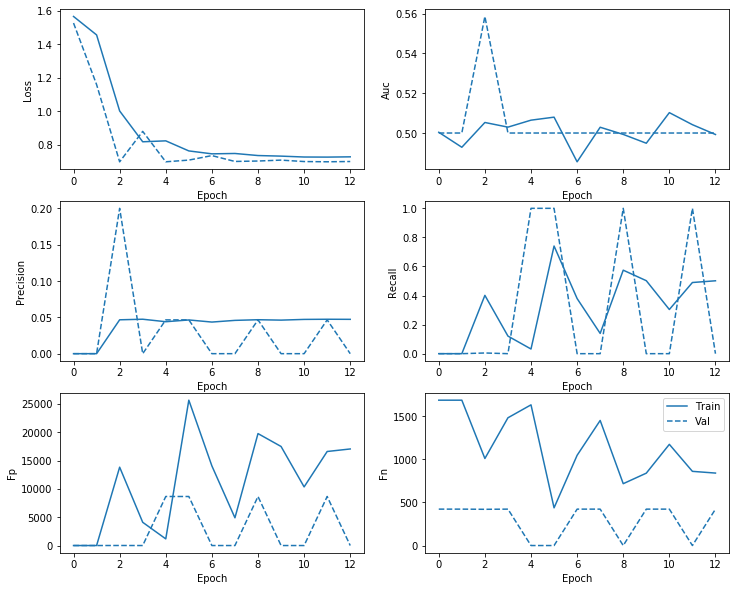

In [34]:
plot_metrics(weighted_history)

In [35]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6880769783418168
tp :  1.0
fp :  6.0
tn :  10838.0
fn :  499.0
accuracy :  0.9554831
precision :  0.14285715
recall :  0.002
auc :  0.5801852
No fire (True Negatives):  10838
False alarms (False Positives):  6
Fires missed (False Negatives):  499
Fires detected (True Positives):  1
Total fires:  500


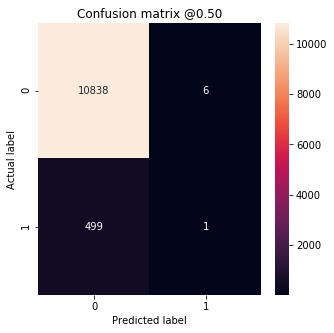

In [36]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)

plot_cm(test_labels, test_predictions_weighted)

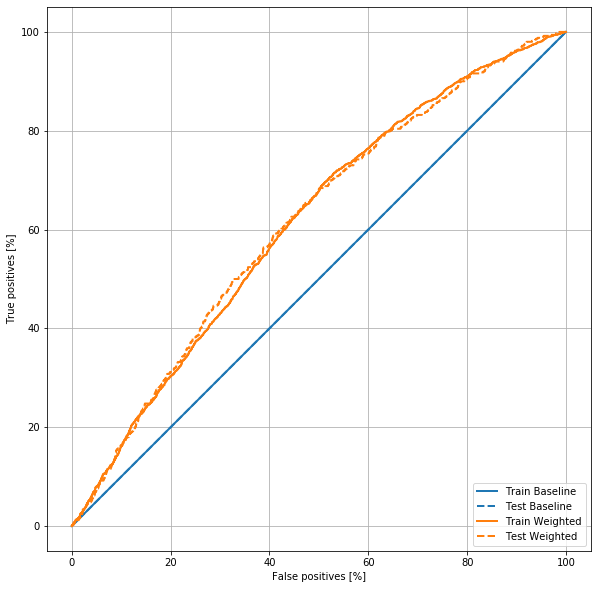

In [37]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')